## sscws Example Jupyter Notebook For Binder
This [notebook](https://jupyter.org/) demonstrates using the [sscws](https://pypi.org/project/sscws/) to access satellite location and (modeled) magnetic field information.
It is specifically designed to be launched on [binder](https://binder.org) for any specific ssc observatory.  For other sscws jupyter notebooks see [notebook examples](https://sscweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples).

### Setup

In [11]:
from datetime import datetime, timedelta
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from packaging import version

from sscws.sscws import SscWs
from sscws.timeinterval import TimeInterval
ssc = SscWs()

### Select An Observatory
The observatory value is set by the [jupyter-notebookparams](https://pypi.org/project/jupyter-notebookparams/) when this notebook is launched on [binder](https://mybinder.org/).

In [12]:
# Parameters:
observatory = "ace"

### Get Observatories
The following code demonstrates how to get the list of available observatories.

In [13]:
result = ssc.get_observatories()
observatories = result['Observatory']
for obs in observatories[:5]:
    print('{:15s} {:20.20s} {:25s}'.format(obs['Id'], obs['Name'], obs['StartTime'].isoformat()))

ace             ACE                  1997-08-25T17:48:00+00:00
active          Active               1989-09-29T00:00:00+00:00
aec             AE-C                 1973-12-17T08:01:00+00:00
aed             AE-D                 1975-10-17T00:00:00+00:00
aee             AE-E                 1975-11-20T21:04:00+00:00


In [14]:
def get_example_time_interval(select_obs, observatories):
    for obs in observatories:
        if obs['Id'] == select_obs:
            end = obs['EndTime']
            return TimeInterval(end - timedelta(hours=2), end)
    return None

example_interval = get_example_time_interval(observatory, observatories)
print(example_interval)

2022-12-19T21:48:00+00:00 2022-12-19T23:48:00+00:00


### Get Locations
The following code gets location information for the International Space Station (ISS) spacecraft and prints a few X coordinate values.

In [15]:
result = ssc.get_locations([observatory], example_interval)

data = result['Data'][0]
coords = data['Coordinates'][0]
print(observatory, 'X coordinates:', coords['X'][:5])

ace X coordinates: [1403531.77808528 1403549.99692449 1403568.25124988 1403586.55655718
 1403604.91251008]


Now plot the ISS location information.

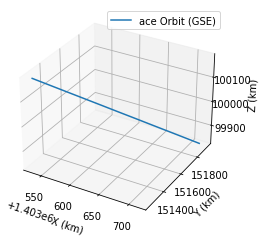

In [16]:
fig = plt.figure()
if version.parse(mpl.__version__) < version.parse('3.4'):
    ax = fig.gca(projection='3d')
else:
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
ax.set_xlabel('X (km)')
ax.set_ylabel('Y (km)')
ax.set_zlabel('Z (km)')
title = data['Id'] + ' Orbit (' + \
        coords['CoordinateSystem'].value.upper() + ')'
ax.plot(coords['X'], coords['Y'], coords['Z'], label=title)
ax.legend()
plt.show()

### Additional Documentation
View the [sscws API](/WebServices/REST/py/sscws/) for additonal features.  Additional [notebook examples](https://sscweb.gsfc.nasa.gov/WebServices/REST/#Jupyter_Notebook_Examples) are also available.